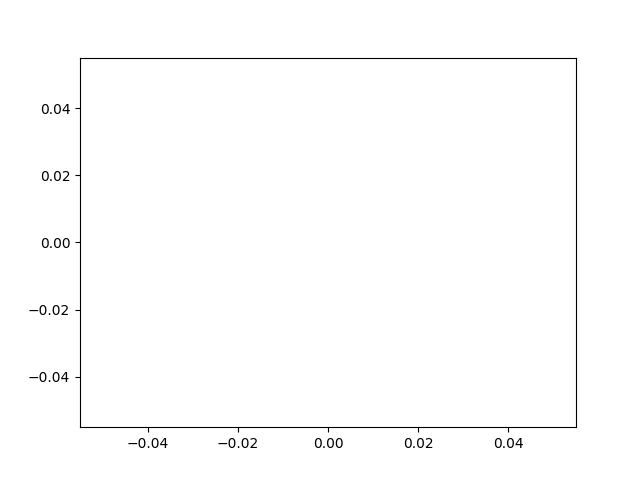

In [4]:
%matplotlib widget 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from functools import partial

def f():
    fig, ax = plt.subplots()
    line1, = ax.plot([], [], 'ro')

    def init():
        ax.set_xlim(0, 2*np.pi)
        ax.set_ylim(-1, 1)
        return line1,

    def update(frame, ln, x, y):
        x.append(frame)
        y.append(np.sin(frame))
        ln.set_data(x, y)
        return ln,

    ani = FuncAnimation(
        fig, partial(update, ln=line1, x=[], y=[]),
        frames=np.linspace(0, 2*np.pi, 128),
        init_func=init, blit=True)

    plt.show()

f()

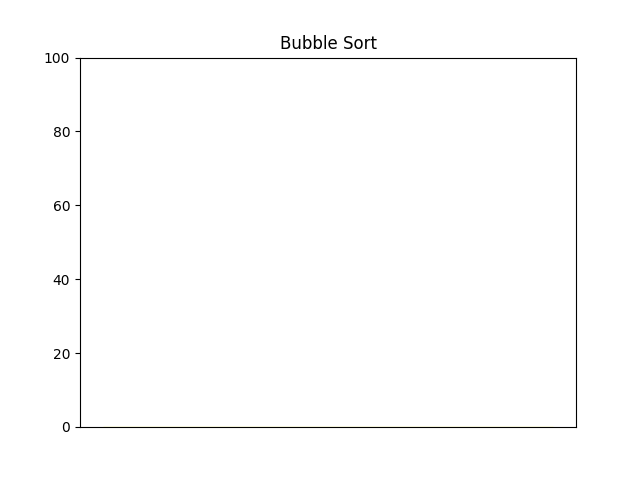

In [1]:
%matplotlib widget 

import random
import functools

import matplotlib.pyplot as plt

import matplotlib.animation as animation

import sort_funcs
from importlib import reload
reload(sort_funcs)

from sort_funcs import gen_merge_sort, gen_bubble_sort

# set bins and numbers
n = 10
hist_bins = list(range(n+1))  # edges = bins + 1
numbers = random.sample(population=list(range(20, 100)), k=n)

sort_f = gen_bubble_sort(numbers=numbers)

# set plot
fig, ax = plt.subplots()
default_color = "green"
hightlight_color = "pink"

dict_containers = dict()

# _, _, bar_container = ax.hist(x=[], bins=hist_bins, lw=1,
#                               ec="yellow", fc=default_color, alpha=0.5)


_, _, dict_containers[0] = ax.hist(x=[], bins=hist_bins, lw=1,
                              ec="yellow", fc=default_color, alpha=0.5)


# remove unnecessary details for cleaner look
ax.set_ylim(top=100)
ax.set_xticklabels([])         
ax.set_title(sort_f.name())
plt.tick_params(bottom=False)  


def animate(new_heights, bar_container):
    for height, patch in zip(new_heights, bar_container.patches):
        current_height = patch.get_height()
        if current_height == 0:  # first frame
            patch.set_height(height)
        elif current_height != height:
            patch.set_height(height)
            patch.set_facecolor(hightlight_color)  # the numbers that swapped positions
        else:
            patch.set_facecolor(default_color)  # default color
    return bar_container.patches


func = functools.partial(animate, bar_container=dict_containers[0])
func_animation = animation.FuncAnimation(fig=fig, func=func, 
                                         interval=400,           
                                         frames=sort_f,
                                         blit=True, 
                                         repeat=False,
                                         cache_frame_data=False)  # to suppress warning


plt.show()


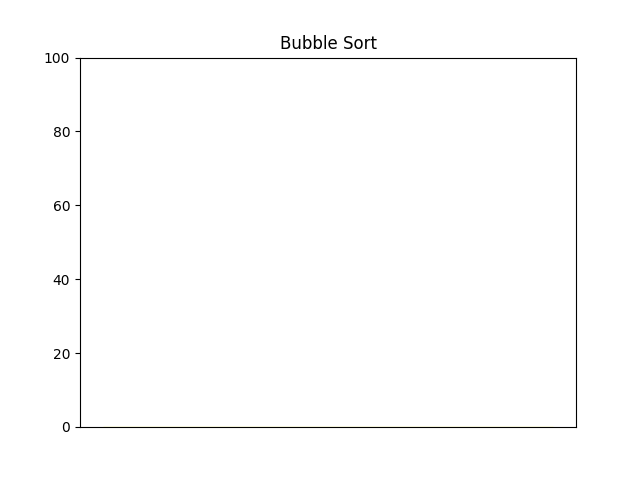

In [5]:
%matplotlib widget 

import random
import functools

import matplotlib.pyplot as plt

import matplotlib.animation as animation

import sort_funcs
from importlib import reload
reload(sort_funcs)

from sort_funcs import gen_merge_sort, gen_bubble_sort


def f():
    # set bins and numbers
    n = 10
    hist_bins = list(range(n+1))  # edges = bins + 1
    numbers = random.sample(population=list(range(20, 100)), k=n)

    sort_f = gen_bubble_sort(numbers=numbers)

    # set plot
    fig, ax = plt.subplots()
    default_color = "green"
    hightlight_color = "pink"
    _, _, bar_container = ax.hist(x=[], bins=hist_bins, lw=1,
                                ec="yellow", fc=default_color, alpha=0.5)

    # remove unnecessary details for cleaner look
    ax.set_ylim(top=100)
    ax.set_xticklabels([])         
    ax.set_title(sort_f.name())
    plt.tick_params(bottom=False)  


    def animate(new_heights, bar_container):
        for height, patch in zip(new_heights, bar_container.patches):
            current_height = patch.get_height()
            if current_height == 0:  # first frame
                patch.set_height(height)
            elif current_height != height:
                patch.set_height(height)
                patch.set_facecolor(hightlight_color)  # the numbers that swapped positions
            else:
                patch.set_facecolor(default_color)  # default color
        return bar_container.patches


    func = functools.partial(animate, bar_container=bar_container)
    func_animation = animation.FuncAnimation(fig=fig, func=func, 
                                            interval=400,           
                                            frames=sort_f,
                                            blit=True, 
                                            repeat=False,
                                            cache_frame_data=False)  # to suppress warning
    
    plt.show()
    return func_animation

    

anim = f()

In [3]:
from itertools import zip_longest

from importlib import reload
import sort_funcs
reload(sort_funcs)

from sort_funcs import (gen_bubble_sort, gen_insertion_sort, 
                        gen_merge_sort, gen_merge_sort_with_more_yields, 
                        gen_quicksort, k_gen_quicksort)

nums = [5, 1, 2, 3]
for results in zip_longest(gen_bubble_sort(nums), gen_insertion_sort(nums), 
                           gen_merge_sort(nums),gen_merge_sort_with_more_yields(nums), 
                           gen_quicksort(nums), k_gen_quicksort(nums),
                           fillvalue=sorted(nums)):
    print(results)

([5, 1, 2, 3], [5, 1, 2, 3], [5, 1, 2, 3], [5, 1, 2, 3], [5, 1, 2, 3], [5, 1, 2, 3])
([1, 5, 2, 3], [1, 5, 2, 3], [1, 5, 2, 3], [1, 5, 2, 3], [1, 5, 2, 3], [1, 5, 2, 3])
([1, 2, 5, 3], [1, 2, 5, 3], [1, 2, 3, 5], [1, 2, 5, 3], [1, 2, 5, 3], [1, 2, 5, 3])
([1, 2, 3, 5], [1, 2, 3, 5], [1, 2, 3, 5], [1, 2, 3, 5], [1, 2, 3, 5], [1, 2, 3, 5])
([1, 2, 3, 5], [1, 2, 3, 5], [1, 2, 3, 5], [1, 2, 3, 5], [1, 2, 3, 5], [1, 2, 3, 5])
([1, 2, 3, 5], [1, 2, 3, 5], [1, 2, 3, 5], [1, 2, 3, 5], [1, 2, 3, 5], [1, 2, 3, 5])
([1, 2, 3, 5], [1, 2, 3, 5], [1, 2, 3, 5], [1, 2, 3, 5], [1, 2, 3, 5], [1, 2, 3, 5])


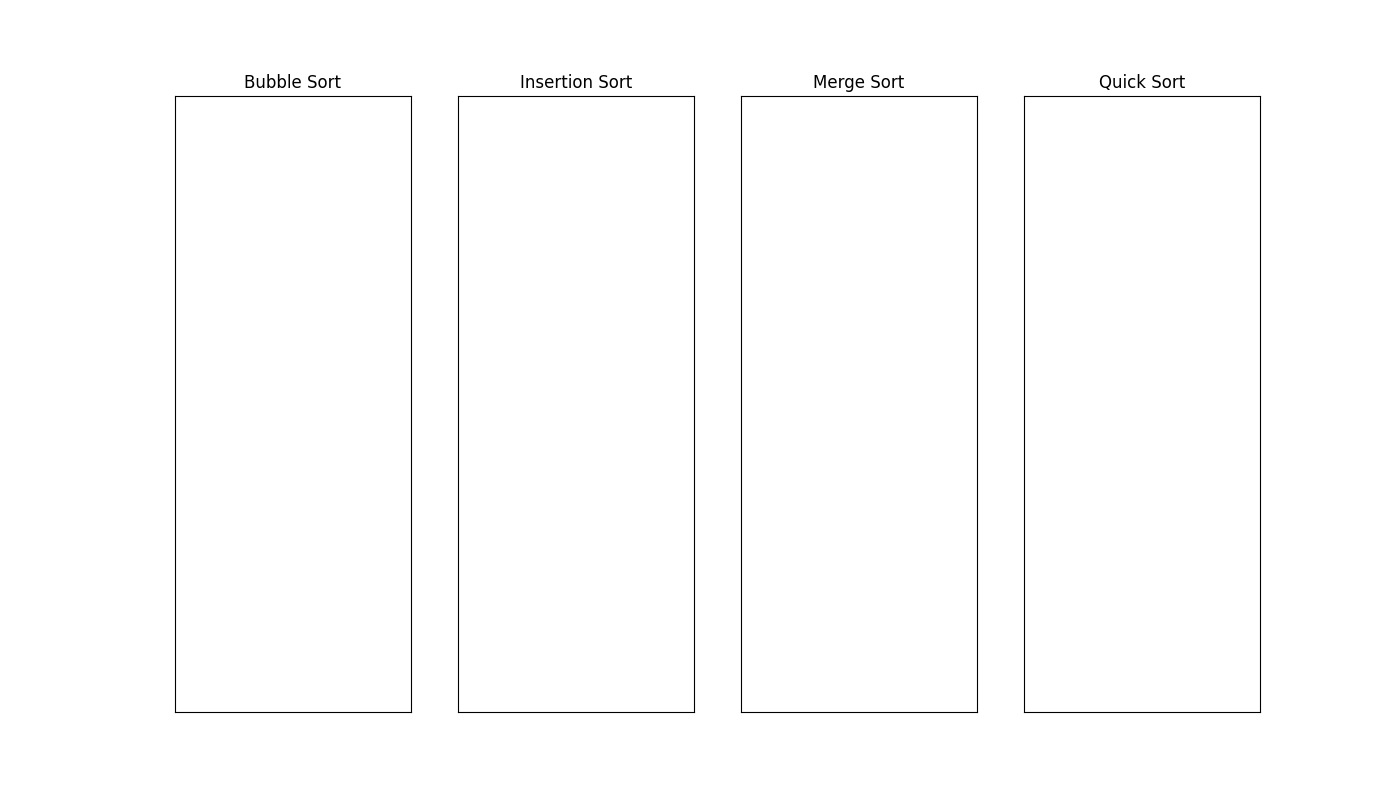

In [3]:
%matplotlib widget 

import random
import functools
from itertools import zip_longest

import matplotlib.pyplot as plt
import matplotlib.animation as animation

from importlib import reload
import sort_funcs
reload(sort_funcs)

from sort_funcs import (gen_bubble_sort, gen_insertion_sort, 
                        gen_merge_sort, gen_quick_sort)


# set bins and numbers
n = 12
hist_bins = list(range(n+1))  # edges = bins + 1
num_min = 40
num_max = 100
numbers = [random.randint(num_min, num_max) for _ in range(n)]

# set frames for animation
frame_generators = [g(numbers=numbers) for g in [gen_bubble_sort, gen_insertion_sort, gen_merge_sort, gen_quick_sort]]
frames = zip_longest(*frame_generators, fillvalue=sorted(numbers))  # some sort faster than others

# set figure
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True)
fig.set_size_inches(14, 8)

# remove ticks and labels for a clean look
axs = [ax1, ax2, ax3, ax4]
plt.setp(axs, xticks=[], yticks=[], ylim=(num_min * 0.5, num_max * 1.05)) 

# set plot title
for ax, gen in zip(axs, frame_generators):
    ax.set_title(gen.name())

# set histograms
default_color = "green"
hightlight_color = "pink"
edge_color = "yellow"

# ugly repeated lines, but has to keep a reference to each bar_container
# _, _, bar_container1 = ax1.hist(x=[], bins=hist_bins, lw=1, ec=edge_color, fc=default_color, alpha=0.5)
# _, _, bar_container2 = ax2.hist(x=[], bins=hist_bins, lw=1, ec=edge_color, fc=default_color, alpha=0.5)
# _, _, bar_container3 = ax3.hist(x=[], bins=hist_bins, lw=1, ec=edge_color, fc=default_color, alpha=0.5)
# _, _, bar_container4 = ax4.hist(x=[], bins=hist_bins, lw=1, ec=edge_color, fc=default_color, alpha=0.5)
# bar_containers = [bar_container1, bar_container2, bar_container3, bar_container4]

dict_containers = dict()
for i, ax in enumerate(axs):
    _, _, dict_containers[i] = ax.hist(x=[], bins=hist_bins, lw=1, ec=edge_color, fc=default_color, alpha=0.5)
bar_containers = [dict_containers[i] for i in range(len(dict_containers))]


# for a cleaner look
plt.tick_params(left=False, bottom=False,
                labelleft=False, labelbottom=False)

def animate(new_heights, bar_containers):
    for heights, bar_container in zip(new_heights, bar_containers):
        for height, patch in zip(heights, bar_container.patches):
            current_height = patch.get_height()
            if current_height == 0:  # first frame
                patch.set_height(height)
            elif current_height != height:
                patch.set_height(height)
                patch.set_facecolor("pink")  # highlight the numbers that swapped positions
            else:
                patch.set_facecolor("green")  # default color
    return bar_containers

func_x = functools.partial(animate, bar_containers=bar_containers)

func_animation = animation.FuncAnimation(fig=fig, 
                                        #  func=func, 
                                            func=func_x,
                                            interval=400,           
                                            # frames=sort_func(numbers),
                                            frames=frames,
                                            blit=True, 
                                            repeat=False,
                                            cache_frame_data=False)  # to suppress warning

plt.show()


In [10]:
from importlib import reload
import sort_funcs
reload(sort_funcs)

from sort_funcs import gen_bubble_sort, gen_insertion_sort, gen_merge_sort_with_more_yields, gen_quicksort


nums = [random.randint(20, 200) for _ in range(16)]

bubble_results = [str(result) for result in gen_bubble_sort(nums)]
merge_results = [str(result) for result in gen_merge_sort_with_more_yields(nums)]
insert_results = [str(result) for result in gen_insertion_sort(nums)]
quick_results = [str(result) for result in gen_quicksort(nums)]

print(f"bubble sort: {len(set(bubble_results))}/{len(bubble_results)}")
print(f"merge sort: {len(set(merge_results))}/{len(merge_results)}")
print(f"insertion sort: {len(set(insert_results))}/{len(insert_results)}")
print(f"quick sort: {len(set(quick_results))}/{len(quick_results)}")


bubble sort: 69/70
merge sort: 27/28
insertion sort: 69/70
quick sort: 25/26


In [6]:
import random
import functools
from itertools import zip_longest

import matplotlib.pyplot as plt
import matplotlib.animation as animation

from importlib import reload
import sort_funcs
reload(sort_funcs)

from sort_funcs import (gen_bubble_sort, gen_insertion_sort, 
                        gen_merge_sort_with_more_yields, gen_quicksort)


numbers = [random.randint(20, 50) for _ in range(5)]

for seq in gen_bubble_sort(numbers=numbers):
    print(seq)

[22, 48, 39, 25, 26]
[22, 39, 48, 25, 26]
[22, 39, 25, 48, 26]
[22, 39, 25, 26, 48]
[22, 25, 39, 26, 48]
[22, 25, 26, 39, 48]
[22, 25, 26, 39, 48]


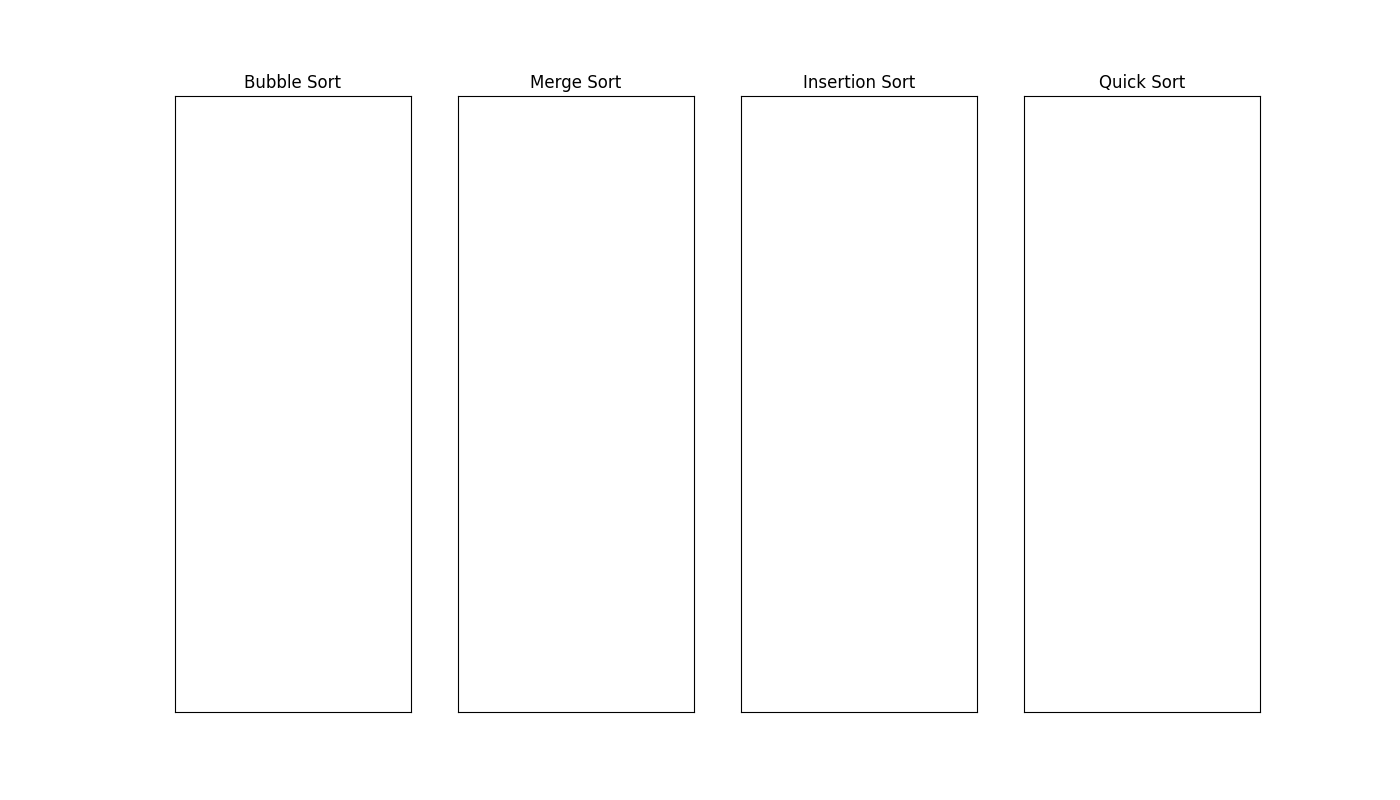

In [9]:
%matplotlib widget 

import random
import functools
from itertools import zip_longest
from typing import List, Union, Callable

import matplotlib.pyplot as plt
import matplotlib.animation as animation

from importlib import reload
import sort_funcs
reload(sort_funcs)

from sort_funcs import (gen_bubble_sort, gen_insertion_sort, 
                        gen_merge_sort, gen_quick_sort)


def run_animation(*sort_functions):
    
    # set bins and numbers
    n = 12
    hist_bins = list(range(n+1))  # edges = bins + 1
    num_min = 40
    num_max = 100
    numbers = [random.randint(num_min, num_max) for _ in range(n)]

    # set frames for animation
    frame_generators = [g(numbers=numbers) for g in sort_functions]
    frames = zip_longest(*frame_generators, fillvalue=sorted(numbers))  # some sort faster than others

    # set figure
    n_funcs = len(sort_functions)
    fig, axs = plt.subplots(1, n_funcs, sharey=True)
    fig.set_size_inches(14, 8)

    # remove ticks and labels for a clean look
    # axs = [ax1, ax2, ax3, ax4]

    if n_funcs == 1:
        axs = [axs]
    
    plt.setp(axs, xticks=[], yticks=[], ylim=(num_min * 0.5, num_max * 1.05)) 
    
    # set histograms
    default_color = "green"
    hightlight_color = "pink"
    edge_color = "yellow"

    # set plot title
    
    for ax, gen in zip(axs, frame_generators):
        ax.set_title(gen.name())

    
    # keep a reference
    dict_bar_containers = dict()
    for i, ax in enumerate(axs):
        _, _, bar_container  = ax.hist(x=[], bins=hist_bins, lw=1, ec=edge_color, fc=default_color, alpha=0.5)
        dict_bar_containers[i] = bar_container
    

    bar_containers = [dict_bar_containers[i] for i in range(len(dict_bar_containers))]


    # for a cleaner look
    plt.tick_params(left=False, bottom=False,
                    labelleft=False, labelbottom=False)

    def animate(new_heights, bar_containers):
        for heights, bar_container in zip(new_heights, bar_containers):
            for height, patch in zip(heights, bar_container.patches):
                current_height = patch.get_height()
                if current_height == 0:  # first frame
                    patch.set_height(height)
                elif current_height != height:
                    patch.set_height(height)
                    patch.set_facecolor(hightlight_color)  
                else:
                    patch.set_facecolor(default_color)  # default color
        return bar_containers

    func_x = functools.partial(animate, bar_containers=bar_containers)

    func_animation = animation.FuncAnimation(fig=fig, 
                                            #  func=func, 
                                                func=func_x,
                                                interval=400,           
                                                # frames=sort_func(numbers),
                                                frames=frames,
                                                blit=True, 
                                                repeat=False,
                                                cache_frame_data=False)  # to suppress warning

    plt.show()
    return func_animation


anim = run_animation(gen_bubble_sort, gen_merge_sort, gen_insertion_sort, gen_quick_sort)